<a href="https://colab.research.google.com/github/mandar-solanki/GAN-exercises/blob/main/GAN_1016_exercise_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Github Repo
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My Drive/project_folder/AI-Fundamentals-Updated
! git pull


Mounted at /content/gdrive
/content/gdrive/My Drive/project_folder/AI-Fundamentals-Updated
Already up to date.


In [6]:
! unzip /content/safari.zip -d /content/safari


Archive:  /content/safari.zip
   creating: /content/safari/safari/test/
  inflating: /content/safari/safari/test/elephant.jpg  
  inflating: /content/safari/safari/test/giraffe.jpg  
  inflating: /content/safari/safari/test/lion.jpg  
  inflating: /content/safari/safari/test/zebra.jpg  
   creating: /content/safari/safari/training/
   creating: /content/safari/safari/training/elephant/
  inflating: /content/safari/safari/training/elephant/1.jpg  
  inflating: /content/safari/safari/training/elephant/10.jpg  
  inflating: /content/safari/safari/training/elephant/11.jpg  
  inflating: /content/safari/safari/training/elephant/12.jpg  
  inflating: /content/safari/safari/training/elephant/13.jpg  
  inflating: /content/safari/safari/training/elephant/14.jpg  
  inflating: /content/safari/safari/training/elephant/15.jpg  
  inflating: /content/safari/safari/training/elephant/16.jpg  
  inflating: /content/safari/safari/training/elephant/17.jpg  
  inflating: /content/safari/safari/training/

## Tensorflow Deep Nueral Network Design Challenge with safari Dataset

In [7]:
import tensorflow
from tensorflow import keras
print('TensorFlow version:',tensorflow.__version__)

TensorFlow version: 2.17.0


In [8]:
import os
data_folder = '/content/safari/safari/training'

In [9]:
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


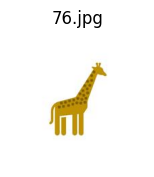

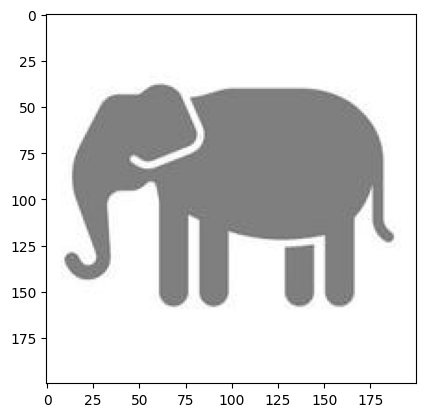

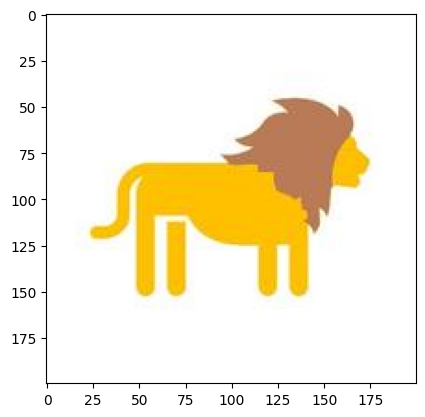

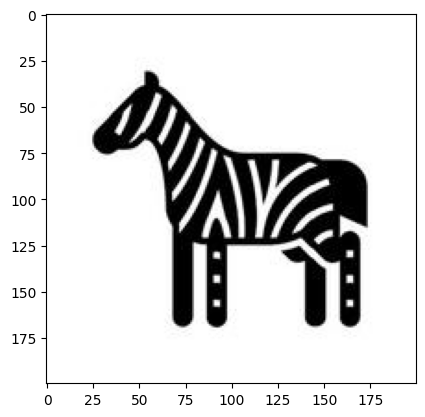

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(8,12))
i=0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder, sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1, len(classes), 1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
    plt.show()
#plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (200, 200)
batch_size = 30

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split = 0.25)

print("Training Dataset")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

print("Validation Dataset")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

classnames = list(train_generator.class_indices.keys())
print('Data Generators ready')


Training Dataset
Found 300 images belonging to 4 classes.
Validation Dataset
Found 96 images belonging to 4 classes.
Data Generators ready


In [12]:
#Define CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(24,(4,4), input_shape=train_generator.image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(24,(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(24,(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 197, 197, 24)        │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 65, 65, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 24)          │           9,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 24)          │           9,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 24)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 24)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           2,404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,060 (86.17 KB)

 Trainable params: 22,060 (86.17 KB)

 Non-trainable params: 0 (0.00 B)

None
